In [ ]:
# pylint: disable=line-too-long, pointless-string-statement, missing-module-docstring
import random
from typing import cast

import matplotlib.pyplot as plt

from src.convex_hull import ConvexHull
from src.line_sweep.line_sweep import LineSweep
from src.point import Point
from src.segment.segment import Segment

# Demonstração Envoltória Convexa

Esta demonstração gera um conjunto de pontos aleatórios,
constrói sua envoltória convexa e a exibe usando a biblioteca `matplotlib`

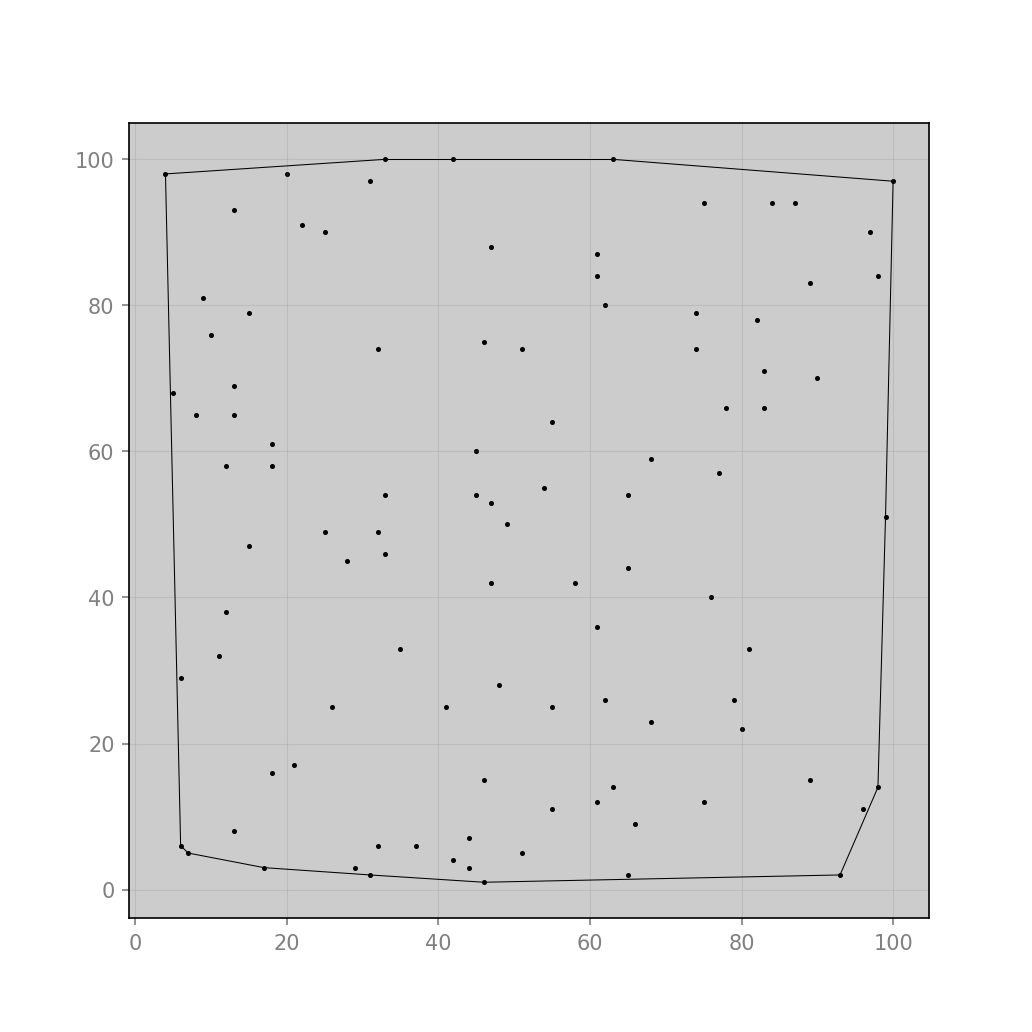

In [1]:
set_of_points: list[Point] = []
for _ in range(100):
    x: int
    y: int
    x, y = random.randint(1, 100), random.randint(1, 100)
    set_of_points.append(Point(x, y))

hull: ConvexHull = ConvexHull(set_of_points, alg="gift_wrapping")
hull.plot()

In [ ]:
""""°°°
# Demonstração Varredura linear

Esta demonstração gera dois triângulos e diz se eles possuem interseção ou não.
°°°"""

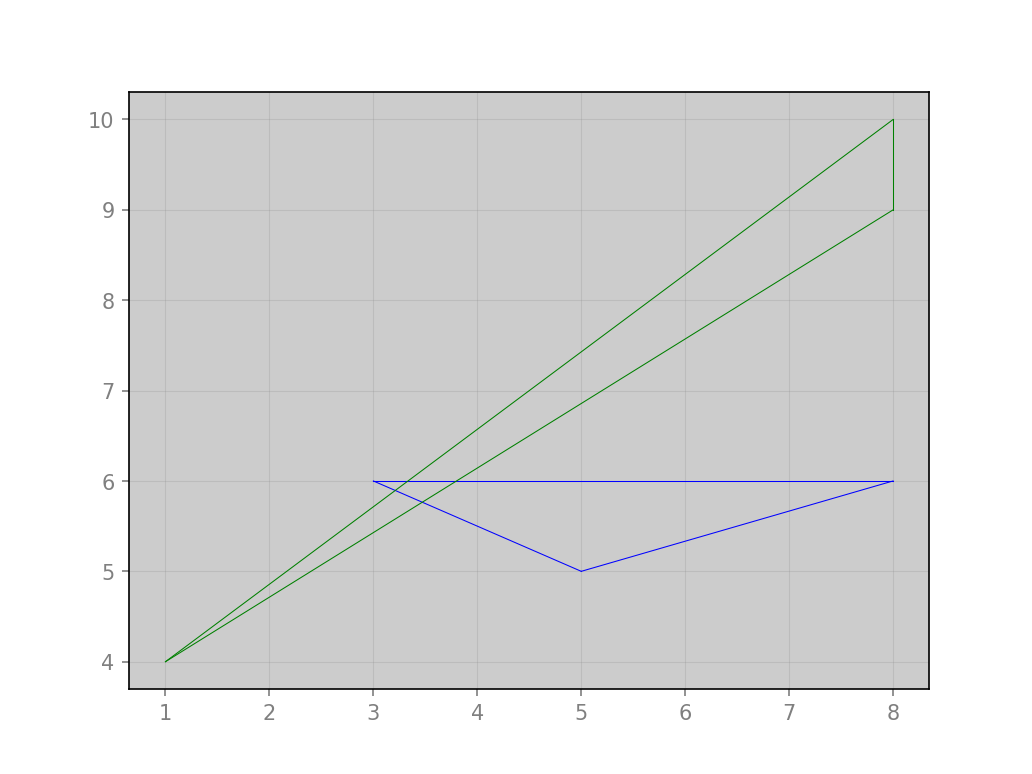


True
[[(3, 6), (8, 6)], [(3, 6), (5, 5)], [(5, 5), (8, 6)]]
[[(1, 4), (8, 9)], [(1, 4), (8, 10)], [(8, 9), (8, 10)]]


In [2]:
def generate_random_polygon(num: int):
    """
    Gere um polígono a partir de um conjunto aleatório de coordenadas de pontos
    Não confere se o polígono é simples (não se intercepta) ou convexo
    """
    x_pool: list[int] = [random.randint(1, 10) for _ in range(num)]
    y_pool: list[int] = [random.randint(1, 10) for _ in range(num)]
    points: list[Point] = [Point(i, j) for i, j in zip(x_pool, y_pool)]
    polygon: list[Segment] = []

    for i in range(num):
        seg: Segment = Segment(points[i], points[i - 1])
        polygon.append(seg)

    return polygon


def is_line_segment(triangle: list[Segment]):
    """
    Checa se os segmentos de um triângulo na verdade formam uma linha
    """
    return triangle[0].is_colinear(triangle[1]) or triangle[0].is_colinear(triangle[2])


def plot_polygon(polygon: list[Segment], color: str):
    """
    Imprime as arestas de um polígono usando a cor `color`
    """
    for edge in polygon:
        plt.plot([edge.p0.x, edge.p1.x], [edge.p0.y, edge.p1.y], color, linewidth=0.5)


# Por simplicidade, use triângulos
n: int = 3

# Evite gerar segmentos
triangle_1: list[Segment] = generate_random_polygon(n)
while is_line_segment(triangle_1):
    triangle_1: list[Segment] = generate_random_polygon(n)
triangle_2: list[Segment] = generate_random_polygon(n)
while is_line_segment(triangle_2):
    triangle_2: list[Segment] = generate_random_polygon(n)

# Crie o gráfico e imprima os polígonos e a malha
_, ax = plt.subplots()
ax = cast(plt.Axes, ax)
ax.grid(which="both", color="grey", linewidth=0.5, linestyle="-", alpha=0.2)
plot_polygon(triangle_1, "blue")
plot_polygon(triangle_2, "green")
plt.show()

# Confira se os polígonos se interceptam
L: LineSweep = LineSweep()
INTERSECTS = L.do_polygons_intersect(triangle_1, triangle_2)

print(INTERSECTS)